In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-grid-stability/smart_grid_stability_augmented.csv


In [2]:
import os

#Preprocessing and Plotting Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix    #Evaluation of model results

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation



In [3]:
all_data = pd.read_csv('../input/smart-grid-stability/smart_grid_stability_augmented.csv')
all_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
all_data = all_data.sample(frac = 1)   # Shuffle the data for better results  
all_data.describe(include = 'all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38280
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917,NaN
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760,NaN
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557,NaN
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142,NaN
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878,NaN


In [5]:
# Creating dummy variable for categorical features to include in model training
all_data = pd.get_dummies(all_data, columns = ['stabf'], drop_first = True)

In [6]:
X_data, Y_data = all_data.drop(columns=['stab', 'stabf_unstable']), all_data['stabf_unstable']

In [7]:
X_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
35661,3.106653,6.508384,1.726836,5.759357,4.263905,-0.877947,-1.998450,-1.387508,0.561214,0.473120,0.949787,0.871137
34232,4.062949,0.898857,9.294640,4.371232,4.818633,-1.658128,-1.526685,-1.633820,0.272557,0.613236,0.246419,0.350259
47371,1.872903,8.657809,4.863280,8.819422,4.719423,-1.860590,-1.563160,-1.295673,0.523527,0.738567,0.691305,0.056261
3688,5.780397,1.702437,3.692586,8.604044,4.384374,-1.316738,-1.157102,-1.910534,0.874238,0.345205,0.357789,0.243509
1479,6.990906,7.768754,0.980863,2.226422,4.006189,-0.893810,-1.797854,-1.314525,0.800175,0.860724,0.207100,0.750979


In [8]:
# Normalize
X_data_norm = X_data.copy()

# Normalization of input features are very helpful in increasing the performance of model.
# Normalization has also been found to increase efficiency of a model while training.
for column in X_data_norm.columns:
    X_data_norm[column] = (X_data_norm[column] - X_data_norm[column].mean()) * 1.0 / X_data_norm[column].std()

X_data_norm.describe()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,-1.895592e-14,3.053513e-14,2.375196e-14,-4.746474e-15,-1.379254e-13,5.237013e-14,-1.441012e-15,4.414952e-14,-4.071746e-14,3.643382e-16,-1.306229e-14,-1.827155e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731749e+00,-1.731985e+00,-1.731985e+00,-1.731985e+00,-2.881701e+00,-1.731906e+00,-1.731906e+00,-1.731906e+00,-1.731999e+00,-1.731935e+00,-1.731935e+00,-1.731935e+00
25%,-8.660585e-01,-8.660143e-01,-8.660143e-01,-8.660143e-01,-7.069270e-01,-8.660104e-01,-8.660104e-01,-8.660104e-01,-8.659381e-01,-8.660323e-01,-8.660323e-01,-8.660323e-01
50%,1.437158e-06,-7.028671e-06,-7.028671e-06,-7.028671e-06,1.363436e-03,8.877925e-06,8.877924e-06,8.877925e-06,3.412648e-05,2.434658e-05,2.434658e-05,2.434658e-05
75%,8.659059e-01,8.659801e-01,8.659801e-01,8.659801e-01,7.078844e-01,8.660332e-01,8.660332e-01,8.660332e-01,8.657800e-01,8.659828e-01,8.659828e-01,8.659828e-01
max,1.731845e+00,1.731976e+00,1.731976e+00,1.731976e+00,2.811245e+00,1.731977e+00,1.731977e+00,1.731977e+00,1.731805e+00,1.731971e+00,1.731971e+00,1.731971e+00


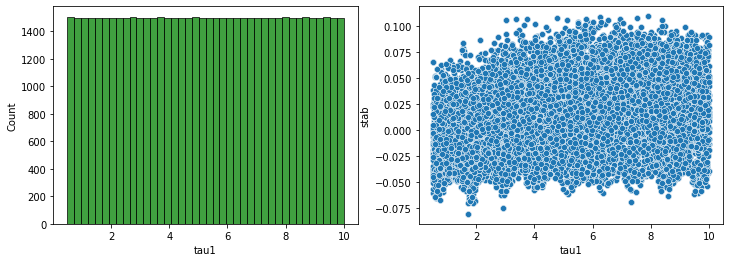

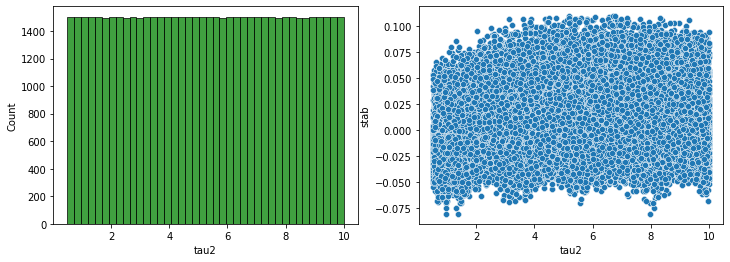

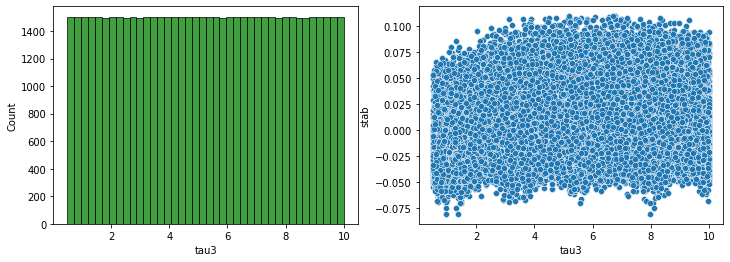

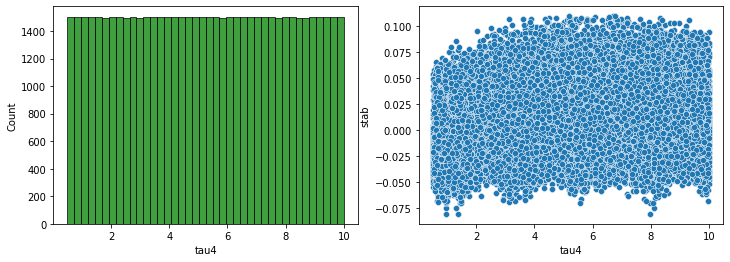

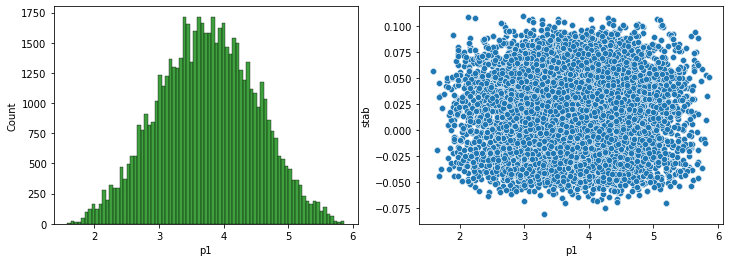

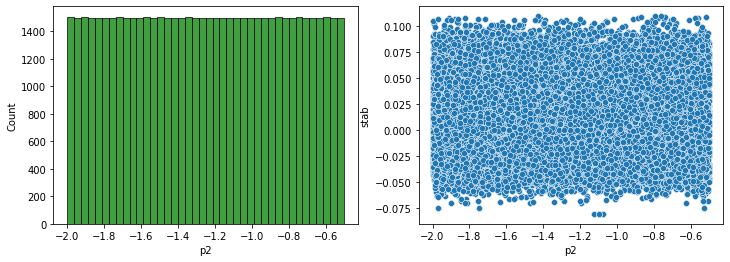

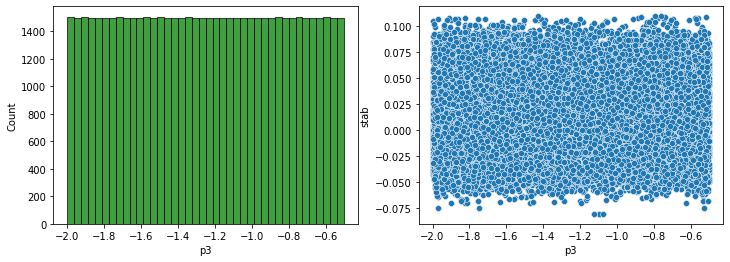

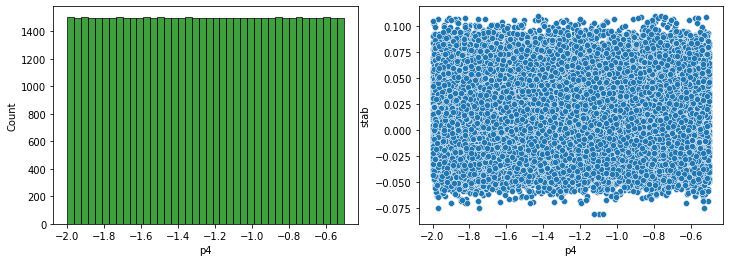

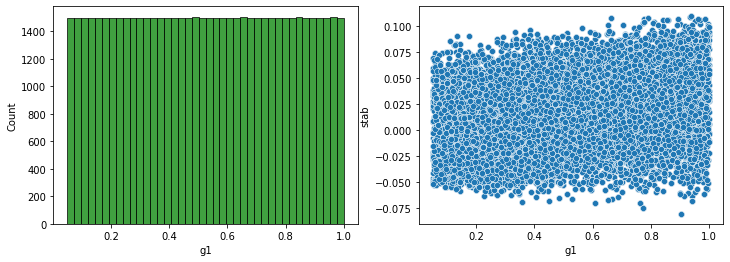

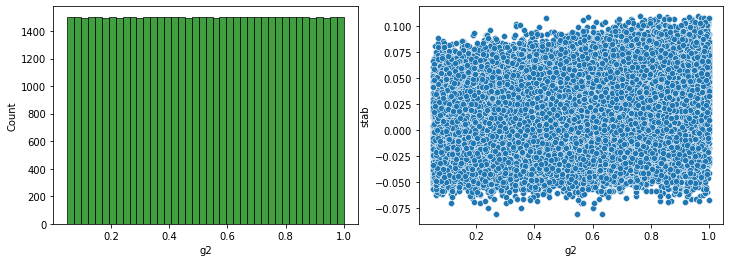

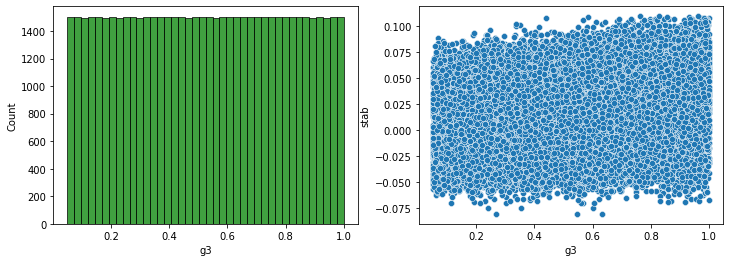

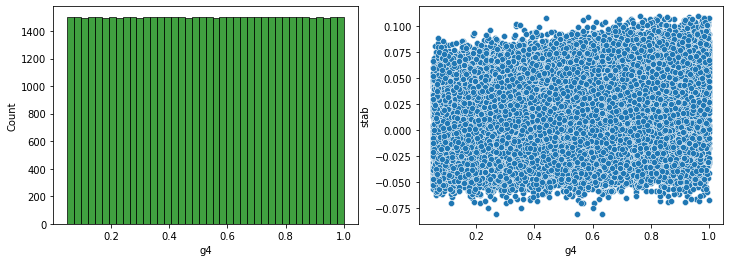

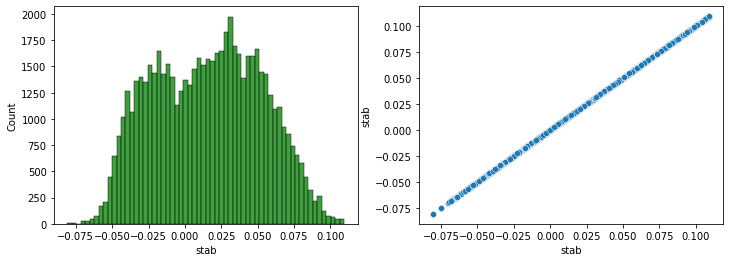

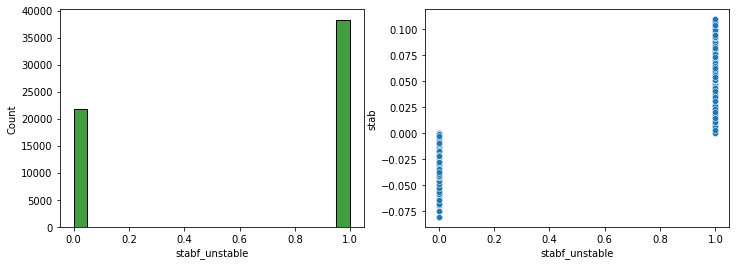

In [9]:
# Let's See the distribution of data wrt all input features and the output feature, stability.

for column in all_data:
    plot_fig, plot_axes = plt.subplots(1, 2, figsize = (12, 4))
    chart_1 = sns.histplot(x=all_data[column], ax = plot_axes[0], color='g')
    
    chart_2 = sns.scatterplot(x = column, y = 'stab', data = all_data, ax = plot_axes[1])

    plt.show()
del plot_fig, plot_axes

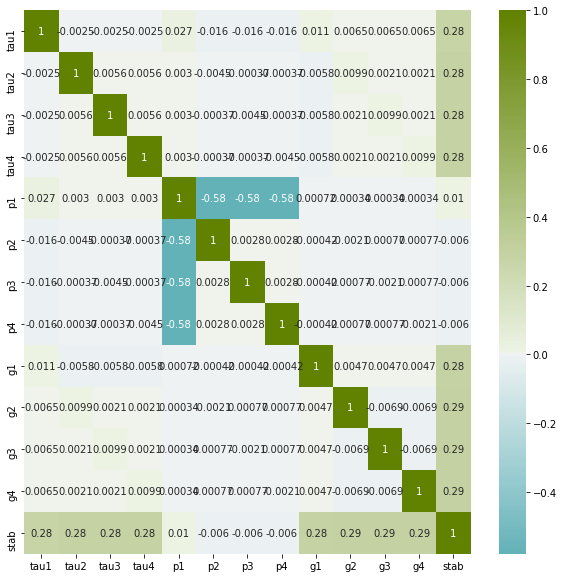

In [10]:
# Correlation matrix helps us to identify features that are more important then the others.
corr_data = all_data.corr()
fig, ax = plt.subplots(figsize = (10, 10))
color_map = sns.diverging_palette(204, 106, s = 100, as_cmap=True)
sns.heatmap(corr_data.drop(columns=['stabf_unstable'], index=['stabf_unstable']), cmap=color_map, annot=True, ax = ax, center=0.00000)
plt.show()
del corr_data

In [11]:
print(X_data_norm.shape, "\n", Y_data.shape)

(60000, 12) 
 (60000,)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data_norm, Y_data, train_size=0.9, random_state=42)

In [13]:
# Model structure

classifier = tf.keras.models.Sequential()



classifier.add(Dense(
    units=256,
    activation='relu',
    input_dim = 12
))


classifier.add(Dense(
    units=128,
    activation='relu',
))


classifier.add(Dense(
    units=64,
    activation='relu',
))


classifier.add(Dense(
    units=32,
    activation='relu',
))


classifier.add(Dense(
    units=16,
    activation='relu',
))


classifier.add(Dense(
    units=8,
    activation='relu',
))


classifier.add(Dense(
    units=1,
    activation='sigmoid',
))



In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3328      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9

In [15]:
# Learning rate Decay is very useful in maximizing the accuracy and efficiency of a model.
# As the accuracy approaches an optimum, it's good, if the learning rate is lower.
# This is obtained using Learning Rate Decay.
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_rate=0.9,
    decay_steps=1500,
    staircase=True
)


In [16]:
path_callbacks = os.path.join(os.getcwd(), 'Callbacks')
if not os.path.isdir('./Callbacks'):
    os.mkdir(path_callbacks)

In [17]:
'''
Adding Callbacks and EarlyStopping
Callbacks and Checkpoints help to keep an eye on model while training and stop the training
if the performance has reached an optimum.
'''
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = './Callbacks/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

early_stop = EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1)
callbacks = [checkpoint, early_stop]

In [18]:
classifier.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [19]:
from datetime import datetime

start_time = datetime.now()
history = classifier.fit(
    x = X_train,
    y = Y_train,
    validation_data=(X_test, Y_test),
    epochs = 200,
    batch_size = 64,
    callbacks = callbacks
)
end_time = datetime.now()
print('Time Taken for the model to train:', end_time - start_time)

Epoch 1/200
844/844 [==============================] - 3s 3ms/step - loss: 0.2891 - accuracy: 0.8642 - val_loss: 0.0969 - val_accuracy: 0.9590

Epoch 00001: val_accuracy improved from -inf to 0.95900, saving model to ./Callbacks/weights-improvement-01-0.96.hdf5
Epoch 2/200
844/844 [==============================] - 2s 2ms/step - loss: 0.0988 - accuracy: 0.9586 - val_loss: 0.1007 - val_accuracy: 0.9607

Epoch 00002: val_accuracy improved from 0.95900 to 0.96067, saving model to ./Callbacks/weights-improvement-02-0.96.hdf5
Epoch 3/200
844/844 [==============================] - 2s 3ms/step - loss: 0.0720 - accuracy: 0.9712 - val_loss: 0.0677 - val_accuracy: 0.9710

Epoch 00003: val_accuracy improved from 0.96067 to 0.97100, saving model to ./Callbacks/weights-improvement-03-0.97.hdf5
Epoch 4/200
844/844 [==============================] - 2s 2ms/step - loss: 0.0621 - accuracy: 0.9744 - val_loss: 0.0511 - val_accuracy: 0.9800

Epoch 00004: val_accuracy improved from 0.97100 to 0.98000, savi

<AxesSubplot:>

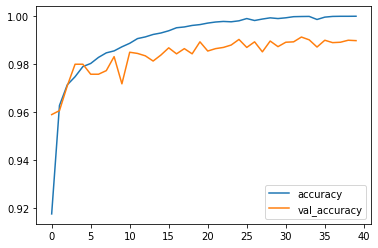

In [20]:
hist_data =pd.DataFrame(history.history)
hist_data.drop(columns=['loss', 'val_loss'], inplace=True)
hist_data.plot()

In [21]:
from sklearn.metrics import accuracy_score
Y_predicted = classifier.predict(X_test)
Y_predicted[Y_predicted < 0.5] = 0
Y_predicted[Y_predicted >= 0.5] = 1
cm = pd.DataFrame(confusion_matrix(Y_test, Y_predicted))
print("Accuracy of model on Test set", accuracy_score(Y_test, Y_predicted))
print(cm)

Accuracy of model on Test set 0.9898333333333333
      0     1
0  2084    38
1    23  3855
